## Install and import the required packages

In [1]:
import re
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

import pickle

## Mount Google Drive and import dataset

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deploy-ml-web-workshop/mbpt_dataset.csv")

data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
data.count()

type     8675
posts    8675
dtype: int64

In [5]:
data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

## Split train and test (to ensure balanced distribution of data)

In [6]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 42, stratify = data.type)

print("\033[93m {}\033[00m" .format('TRAIN DATA \n'), train_data)
print(train_data['type'].value_counts())

print("\033[93m {}\033[00m" .format('TEST DATA \n'),  test_data)
print(test_data['type'].value_counts())

# PS: "\033[93m {}\033[00m" .format('\n AFTER \n') is just a way
# to change the color of the printed string 'TRAIN DATA \n' using ANSI Escape Code.

 TRAIN DATA 
       type                                              posts
8331  INFP  'this is actually exactly what i expected!  :l...
1290  ISTP  'Nope.  Not now, not ever.  I'm too busy with ...
1982  ENFJ  'Yes peace is the absence of conflict - your I...
769   INFP  'I apologize for the delayed response, but tha...
8339  INFP  'Nightglow, I can't even imagine what you must...
...    ...                                                ...
4273  INFP  'I'm annoyed.  I'm sick of negative associatio...
2698  INFP  'My dad just told me that he loved me for I th...
7435  ENTJ  'I have dated a few INFJs, including my curren...
1843  INTP  'People who are unable to replace social norms...
2530  ENTP  'Yep! you're right! I agree with you!! i think...

[6940 rows x 2 columns]
INFP    1466
INFJ    1176
INTP    1043
INTJ     873
ENTP     548
ENFP     540
ISTP     270
ISFP     217
ENTJ     185
ISTJ     164
ENFJ     152
ISFJ     133
ESTP      71
ESFP      38
ESFJ      33
ESTJ      31
Name: typ

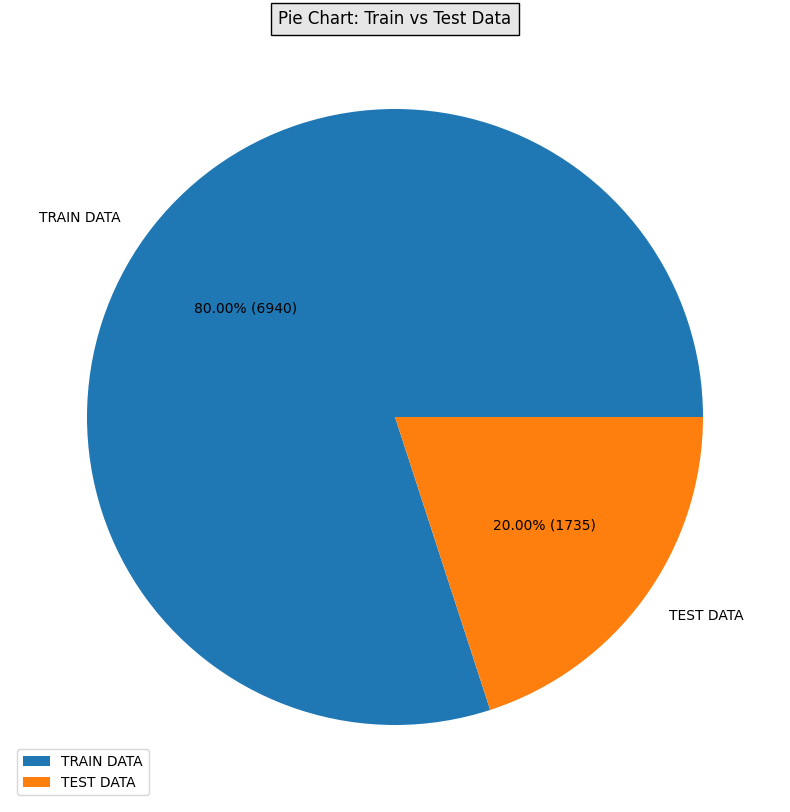

In [7]:
title = "Pie Chart: Train vs Test Data"

values = ["TRAIN DATA", "TEST DATA"]

data = [train_data.posts.count(), test_data.posts.count()]

fig = plt.figure(figsize =(10, 10))
plt.pie(data, labels = values, autopct=lambda p:f'{p:.2f}% ({p*sum(data)/100 :.0f})')

plt.title(title, bbox={"facecolor":"0.9", "pad":5})
plt.legend(loc="lower left")

plt.show()


## Data pre-processing and visualization

### Clean the "posts" text data

In [8]:
def clean_data(data):
    data_length = []
    cleaned_posts = []

    for sentence in tqdm(data.posts):
        sentence = sentence.lower()

        # Remove links from text data
        sentence = re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+', ' ', sentence)

        # Remove other symbols
        sentence = re.sub('[^0-9a-z]', ' ', sentence)

        # Append cleaned data to List
        data_length.append(len(sentence.split()))
        cleaned_posts.append(sentence)

    return cleaned_posts, data_length

### Print the cleaned "posts" for the entire dataset

In [9]:
data_clone = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deploy-ml-web-workshop/mbpt_dataset.csv")

x, y = clean_data(data_clone)

posts_index = data_clone.columns[1]
data_clone.drop(posts_index, axis = 1, inplace = True)
data_clone[posts_index] = x

print("\033[93m {}\033[00m" .format('\n CLEANED DATA FOR ALL \n'), data_clone)
# data_clone.to_csv(r'cleaned_data.csv', index = False, header = True)

100%|██████████| 8675/8675 [00:03<00:00, 2714.55it/s]

 
 CLEANED DATA FOR ALL 
       type                                              posts
0     INFJ     and intj moments     sportscenter not top t...
1     ENTP   i m finding the lack of me in these posts ver...
2     INTP   good one            course  to which i say i ...
3     INTJ   dear intp    i enjoyed our conversation the o...
4     ENTJ   you re fired    that s another silly misconce...
...    ...                                                ...
8670  ISFP     just because i always think of cats as fi d...
8671  ENFP   so   if this thread already exists someplace ...
8672  INTP   so many questions when i do these things   i ...
8673  INFP   i am very conflicted right now when it comes ...
8674  INFP   it has been too long since i have been on per...

[8675 rows x 2 columns]


### Wordcloud for the cleaned "posts"

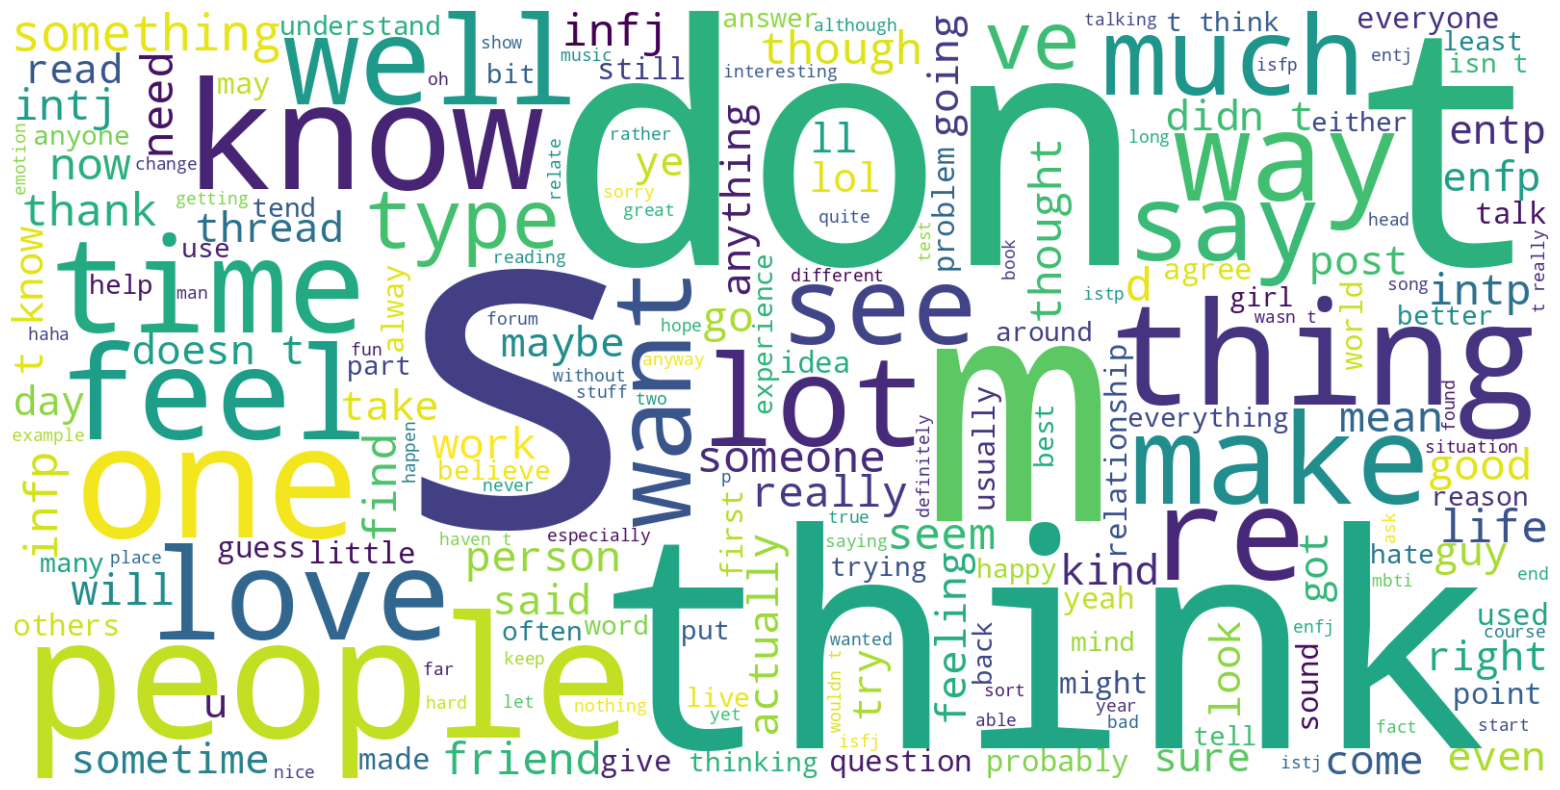

In [10]:
all_posts = []
all_posts = '\t'.join(data_clone["posts"])

wc = WordCloud(background_color="white", width=1600, height=800)

plt.figure(figsize=(20,10))
plt.imshow(wc.generate(all_posts), interpolation="bilinear")
plt.axis("off")

# plt.savefig("wordcloud-file.png", format="png", dpi = 1200)
plt.show()

### Print the cleaned "train" and "test" data

In [11]:
train_data.posts, train_length = clean_data(train_data)

print("\033[93m {}\033[00m" .format('\n CLEANED TRAIN DATA ONLY \n'), train_data.posts)

100%|██████████| 6940/6940 [00:02<00:00, 2624.40it/s]

 
 CLEANED TRAIN DATA ONLY 
 8331     this is actually exactly what i expected    l...
1290     nope   not now  not ever   i m too busy with ...
1982     yes peace is the absence of conflict   your i...
769      i apologize for the delayed response  but tha...
8339     nightglow  i can t even imagine what you must...
                              ...                        
4273     i m annoyed   i m sick of negative associatio...
2698     my dad just told me that he loved me for i th...
7435     i have dated a few infjs  including my curren...
1843     people who are unable to replace social norms...
2530     yep  you re right  i agree with you   i think...
Name: posts, Length: 6940, dtype: object


In [12]:
test_data.posts, test_length = clean_data(test_data)

print("\033[93m {}\033[00m" .format('\n CLEANED TEST DATA ONLY \n'), test_data.posts)

100%|██████████| 1735/1735 [00:00<00:00, 2717.32it/s]

 
 CLEANED TEST DATA ONLY 
 7814     macona   it depends if the big family has ext...
2233        sveltihel     brilliant  but this was the ...
7261       heylena    lol  compliment accepted  thank ...
7794     2pac right       rocket coffin  like packed w...
2950     the title of this thread is misleading  there...
                              ...                        
2006     one sentence is too restrictive to accurately...
7137     i wanted to be like some odd hybrid of dr  ja...
6091     i just took the cognitive process test here  ...
2997     don t get so caught up in a fantacy about you...
5458     doll i love all the movies you listed  and th...
Name: posts, Length: 1735, dtype: object


## Tokenize and transform the data

In [13]:
vectorizer = TfidfVectorizer(max_features = 5000, stop_words = "english")

vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=5000, stop_words='english')

In [14]:
train_post = vectorizer.transform(train_data.posts).toarray()

test_post = vectorizer.transform(test_data.posts).toarray()

In [15]:
train_post.shape

(6940, 5000)

In [16]:
target_encoder = LabelEncoder()

train_target = target_encoder.fit_transform(train_data.type)
test_target = target_encoder.fit_transform(test_data.type)

## Models testing and selection

In [17]:
# Store the accuracy of each model

models_accuracy = {}

#### Logistic Regression

In [18]:
model_log = LogisticRegression(max_iter = 3000, C = 0.5, n_jobs = -1)

model_log.fit(train_post, train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [19]:
print('Train Classification Report \n ', classification_report(train_target, model_log.predict(train_post), zero_division=0, target_names = target_encoder.inverse_transform([i for i in range(16)])))

print('Test Classification Report \n', classification_report(test_target, model_log.predict(test_post), zero_division=0, target_names = target_encoder.inverse_transform([i for i in range(16)])))

Train Classification Report 
                precision    recall  f1-score   support

        ENFJ       0.83      0.16      0.27       152
        ENFP       0.81      0.65      0.72       540
        ENTJ       0.93      0.29      0.44       185
        ENTP       0.81      0.68      0.74       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.04      0.08        71
        INFJ       0.74      0.83      0.78      1176
        INFP       0.66      0.93      0.77      1466
        INTJ       0.75      0.81      0.78       873
        INTP       0.69      0.87      0.77      1043
        ISFJ       0.92      0.26      0.41       133
        ISFP       0.87      0.24      0.38       217
        ISTJ       0.84      0.25      0.38       164
        ISTP       0.87      0.51      0.64       270

    accuracy                           0.72      

In [20]:
models_accuracy['Logistic Regression'] = accuracy_score(test_target, model_log.predict(test_post))

In [21]:
# Construct a confusion matrix

prd = model_log.predict(test_post)

cm = confusion_matrix(test_target, prd)

print(cm)

[[  4   2   1   0   0   0   0   0  10  19   0   1   0   0   0   1]
 [  0  74   0   3   0   0   0   0  10  28  14   2   1   0   1   2]
 [  0   2   7   3   0   0   0   0   4  12  14   3   0   0   0   1]
 [  0   7   0  70   0   0   0   0  16  15  11  17   0   1   0   0]
 [  0   0   0   1   0   0   0   0   2   5   0   1   0   0   0   0]
 [  0   2   1   0   0   0   0   0   0   4   1   2   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   4   1   1   0   0   0   0]
 [  0   0   0   1   0   0   0   0   5   5   2   4   0   0   0   1]
 [  0   2   0   2   0   0   0   0 210  52   8  18   0   0   0   2]
 [  0   4   0   4   0   0   0   0  14 322   9  11   0   1   0   1]
 [  0   0   0   5   0   0   0   0  18  20 146  27   0   0   1   1]
 [  0   0   0   5   0   0   0   0  10  20  13 212   0   0   0   1]
 [  0   2   0   0   0   0   0   0   8  11   3   5   4   0   0   0]
 [  0   0   0   5   0   0   0   0   6  30   2   2   0   9   0   0]
 [  0   2   0   2   0   0   0   0   5  14  10   4   0   0   3 

#### Linear Support Vector Classifier

In [22]:
model_linear_svc=LinearSVC(C = 0.1)

model_linear_svc.fit(train_post, train_target)

LinearSVC(C=0.1)

In [23]:
print('Train Classification Report \n ', classification_report(train_target, model_linear_svc.predict(train_post), zero_division=0, target_names = target_encoder.inverse_transform([i for i in range(16)])))

print('Test Classification Report \n', classification_report(test_target, model_linear_svc.predict(test_post), zero_division=0, target_names = target_encoder.inverse_transform([i for i in range(16)])))

Train Classification Report 
                precision    recall  f1-score   support

        ENFJ       0.91      0.45      0.61       152
        ENFP       0.85      0.77      0.81       540
        ENTJ       0.93      0.64      0.76       185
        ENTP       0.84      0.82      0.83       548
        ESFJ       0.92      0.33      0.49        33
        ESFP       1.00      0.16      0.27        38
        ESTJ       1.00      0.32      0.49        31
        ESTP       0.91      0.44      0.59        71
        INFJ       0.83      0.86      0.85      1176
        INFP       0.77      0.93      0.85      1466
        INTJ       0.83      0.86      0.85       873
        INTP       0.81      0.90      0.85      1043
        ISFJ       0.92      0.68      0.78       133
        ISFP       0.90      0.59      0.71       217
        ISTJ       0.88      0.65      0.75       164
        ISTP       0.90      0.81      0.86       270

    accuracy                           0.82      

In [24]:
models_accuracy['Linear Support Vector Classifier'] = accuracy_score(test_target, model_linear_svc.predict(test_post))

#### Support Vector Classifier

In [25]:
model_svc=SVC()

model_svc.fit(train_post, train_target)

SVC()

In [26]:
print('Train Classification Report \n ', classification_report(train_target, model_svc.predict(train_post), zero_division=0, target_names = target_encoder.inverse_transform([i for i in range(16)])))

print('Test Classification Report \n ', classification_report(test_target, model_svc.predict(test_post), zero_division=0, target_names = target_encoder.inverse_transform([i for i in range(16)])))

Train Classification Report 
                precision    recall  f1-score   support

        ENFJ       0.97      0.86      0.91       152
        ENFP       0.96      0.96      0.96       540
        ENTJ       0.99      0.90      0.94       185
        ENTP       0.95      0.96      0.96       548
        ESFJ       1.00      0.58      0.73        33
        ESFP       1.00      0.37      0.54        38
        ESTJ       1.00      0.52      0.68        31
        ESTP       1.00      0.83      0.91        71
        INFJ       0.95      0.97      0.96      1176
        INFP       0.93      0.98      0.96      1466
        INTJ       0.96      0.97      0.96       873
        INTP       0.95      0.98      0.96      1043
        ISFJ       1.00      0.88      0.94       133
        ISFP       0.97      0.90      0.94       217
        ISTJ       0.94      0.91      0.93       164
        ISTP       0.98      0.93      0.95       270

    accuracy                           0.95      

In [27]:
models_accuracy['Support Vector Classifier'] = accuracy_score(test_target, model_svc.predict(test_post))

#### Multinomial Naive Bayes

In [28]:
model_multinomial_nb = MultinomialNB()

model_multinomial_nb.fit(train_post, train_target)

MultinomialNB()

In [29]:
print('Train Classification Report \n ', classification_report(train_target,model_multinomial_nb.predict(train_post), zero_division=0, target_names=target_encoder.inverse_transform([i for i in range(16)])))

print('Test Classification Report \n ', classification_report(test_target,model_multinomial_nb.predict(test_post), zero_division=0, target_names=target_encoder.inverse_transform([i for i in range(16)])))

Train Classification Report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       0.93      0.02      0.05       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.92      0.08      0.15       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.51      0.62      0.56      1176
        INFP       0.36      0.93      0.52      1466
        INTJ       0.78      0.44      0.56       873
        INTP       0.59      0.65      0.62      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       0.00      0.00      0.00       270

    accuracy                           0.46      

In [30]:
models_accuracy['Multinomial Naive Bayes'] = accuracy_score(test_target, model_multinomial_nb.predict(test_post))

#### Random Forest Classifier

In [31]:
model_forest = RandomForestClassifier(max_depth = 10)

model_forest.fit(train_post, train_target)

RandomForestClassifier(max_depth=10)

In [32]:
print('Train Classification Report \n ', classification_report(train_target, model_forest.predict(train_post), zero_division=0, target_names = target_encoder.inverse_transform([i for i in range(16)])))

print('Test Classification Report \n ', classification_report(test_target, model_forest.predict(test_post), zero_division=0, target_names = target_encoder.inverse_transform([i for i in range(16)])))

Train Classification Report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.09      0.16       152
        ENFP       1.00      0.34      0.51       540
        ENTJ       1.00      0.07      0.13       185
        ENTP       0.98      0.55      0.70       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.01      0.03        71
        INFJ       0.76      0.80      0.78      1176
        INFP       0.44      1.00      0.61      1466
        INTJ       0.91      0.69      0.79       873
        INTP       0.81      0.86      0.83      1043
        ISFJ       1.00      0.03      0.06       133
        ISFP       1.00      0.02      0.05       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       0.98      0.23      0.38       270

    accuracy                           0.65      

In [33]:
models_accuracy['Random Forest Classifier'] = accuracy_score(test_target, model_forest.predict(test_post))

## Models accuracy summary

In [34]:
models_accuracy

accuarcy = pd.DataFrame(models_accuracy.items(), columns = ['Models', 'Test accuracy'])

accuarcy.sort_values(by = 'Test accuracy', ascending = False, ignore_index = True).style.background_gradient(cmap = 'Blues')

,Models,Test accuracy
0,Linear Support Vector Classifier,0.661671
1,Support Vector Classifier,0.649568
2,Logistic Regression,0.628242
3,Random Forest Classifier,0.453026
4,Multinomial Naive Bayes,0.378098


## Save (pickle) the final model

In [35]:
# Vectorizer
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

# Model
pickle.dump(model_linear_svc, open('model.pkl', 'wb'))

### Load and test the saved model

In [36]:
loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
loaded_model = pickle.load(open('model.pkl', 'rb'))

message = ["This is pretty much the worse movie I have ever watched. It's completely thrash!"]
message = loaded_vectorizer.transform(message)

result = loaded_model.predict(message)

print(result, target_encoder.inverse_transform(result))

[11] ['INTP']
